In [25]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix, plot_confusion_matrix, classification_report
from nltk import agreement

import pandas as pd
import numpy as np


In [42]:
def conll_to_pd(path):
    result=list()
    x='?.!,-~!$%&()*+,-./:;<=>?[\]^_`{|}~'
    f = open(path,"r", encoding='utf-8') 
    sym=''
    c= 0
    index=0
    for line in f.readlines():
        # try:
        line_split=line.split(" ")
        n_token=len(line_split)
        token=line_split[0]
        # print(n_token)
        ner=line_split[-1].replace("\n","")
        
        # skip unwanted parts of the data
        if len(token.strip())==0 or token=="-DOCSTART-": 
            # print(token)
            continue
        elif token.isdigit() and len(str(token))==19:
            id=token
            index= 0
        else:
            # if (index==0 and token[0]=='"'):# or index==n_token-1 or index==n_token:
            #     print(token,n_token)
            #     continue
            if len(token)>1 and any(c.isalpha() for c in token)  and ((token[0] in '\'"' and token[-1] not in '\'"') or token[0] in x):
                sym=token[0]
                token=token[1:].strip(x)
                result.append({'token':sym, 'ner':'O', 'tweet_id':id, 'index':index})
                index+=1
                n_token+=1

            if len(token)>1 and any(c.isalpha() for c in token) and ((token[0] not in '\'"' and token[-1] in '\'"') or token[-1] in x):
                sym=token[-1]
                token=token[:-1].strip(x)
                result.append({'token':token, 'ner':ner, 'tweet_id':id, 'index':index})
                index+=1
                n_token+=1
                result.append({'token':sym, 'ner':'O', 'tweet_id':id, 'index':index})
            else:
                result.append({'token':token, 'ner':ner, 'tweet_id':id, 'index':index})
            if ner not in ['B-EV', 'B-LOC', 'B-ORG', 'B-PER', 'B-PROD', 'B-WA', 'I-EV', 'I-LOC', 'I-ORG', 'I-PER', 'I-PROD', 'I-WA', 'O']:
                print(id)
            index+=1
    df_result = pd.DataFrame(result)
    remove_index= list(df_result.groupby(['tweet_id']).index.idxmin())
    remove_index.extend(list(df_result.groupby(['tweet_id']).index.idxmax()))
    df_result.drop(remove_index, inplace=True)
    df_result.reset_index(drop=True,inplace=True)
    df_result["index"]=df_result["index"]-1
    return df_result

def merge_two_df(path1,path2):
    df1=conll_to_pd(path1)
    df2=conll_to_pd(path2)
    if df1.shape == df2.shape:
        df1.rename(columns={'ner':'annotator_1'},inplace=True)
        df1['annotator_2']=df2.ner
        df1=df1[['tweet_id','token','index','annotator_1', 'annotator_2']]
        return df1
    return None

In [43]:
import os
rootdir='.\\'
paths=list()
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".conll") and file.startswith("DONE"):
            paths.append(filepath)

print(paths)

['.\\raw_iter1\\DONE-Iterasi 1_#1-300_celine.conll', '.\\raw_iter1\\DONE-Iterasi 1_#1-300_sari.conll', '.\\raw_iter1\\DONE-Iterasi 1_#1400-1900_haikal.conll', '.\\raw_iter1\\DONE-Iterasi 1_#1400-1900_kholifah.conll', '.\\raw_iter1\\DONE-Iterasi 1_#1900-2500_aisha.conll', '.\\raw_iter1\\DONE-Iterasi 1_#1900-2500_nicky.conll', '.\\raw_iter1\\DONE-Iterasi 1_#2500-3000_dini.conll', '.\\raw_iter1\\DONE-Iterasi 1_#2500-3000_yasmin.conll', '.\\raw_iter1\\DONE-Iterasi 1_#300-600_Ale.conll', '.\\raw_iter1\\DONE-Iterasi 1_#300-600_oci.conll', '.\\raw_iter1\\DONE-Iterasi 1_#600-900_ale.conll', '.\\raw_iter1\\DONE-Iterasi 1_#600-900_nadhir.conll', '.\\raw_iter1\\DONE-Iterasi 1_#900-1400_dinda.conll', '.\\raw_iter1\\DONE-Iterasi 1_#900-1400_fadil.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3000-3300_Celine.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3000-3300_Sari.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3300-3600_Nadhir.conll', '.\\raw_iter2\\DONE-Iterasi 2_#3300-3600_Oci.conll', '.\\raw_iter2\\DONE-Iterasi 2

In [44]:
kappa_score_list=dict()
for i in range(0,len(paths)-2,2):
    if i%2==0:
        print(paths[i],paths[i+1])
        temp_df=merge_two_df(paths[i],paths[i+1])
        # print(sorted(temp_df.annotator_1.unique()))
        # print(sorted(temp_df.annotator_2.unique()))
        kappa_score_list[paths[i].split("\\")[-1].split("_")[1][1:]]=cohen_kappa_score(temp_df.annotator_1,temp_df.annotator_2)
# final_df=pd.concat(dfs)

.\raw_iter1\DONE-Iterasi 1_#1-300_celine.conll .\raw_iter1\DONE-Iterasi 1_#1-300_sari.conll
.\raw_iter1\DONE-Iterasi 1_#1400-1900_haikal.conll .\raw_iter1\DONE-Iterasi 1_#1400-1900_kholifah.conll
.\raw_iter1\DONE-Iterasi 1_#1900-2500_aisha.conll .\raw_iter1\DONE-Iterasi 1_#1900-2500_nicky.conll
.\raw_iter1\DONE-Iterasi 1_#2500-3000_dini.conll .\raw_iter1\DONE-Iterasi 1_#2500-3000_yasmin.conll
.\raw_iter1\DONE-Iterasi 1_#300-600_Ale.conll .\raw_iter1\DONE-Iterasi 1_#300-600_oci.conll
.\raw_iter1\DONE-Iterasi 1_#600-900_ale.conll .\raw_iter1\DONE-Iterasi 1_#600-900_nadhir.conll
.\raw_iter1\DONE-Iterasi 1_#900-1400_dinda.conll .\raw_iter1\DONE-Iterasi 1_#900-1400_fadil.conll
.\raw_iter2\DONE-Iterasi 2_#3000-3300_Celine.conll .\raw_iter2\DONE-Iterasi 2_#3000-3300_Sari.conll
.\raw_iter2\DONE-Iterasi 2_#3300-3600_Nadhir.conll .\raw_iter2\DONE-Iterasi 2_#3300-3600_Oci.conll
.\raw_iter2\DONE-Iterasi 2_#3600-4000_Ale.conll .\raw_iter2\DONE-Iterasi 2_#3600-4000_Fadil.conll
.\raw_iter2\DONE-Itera

In [45]:
kappa_score_list

{'1-300': 0.9848269243837997,
 '1400-1900': 0.9714603810676828,
 '1900-2500': 0.8930834425249359,
 '2500-3000': 0.9066832791225328,
 '300-600': 0.7614238800776165,
 '600-900': 0.9575354163985822,
 '900-1400': 0.9637822373930449,
 '3000-3300': 0.9520224834261107,
 '3300-3600': 0.9245029875082866,
 '3600-4000': 0.9790506360217253,
 '4300-4800': 0.9726578087053261,
 '4800-5300': 0.9592416235041485,
 '5300-5900': 0.9769400911227973,
 '5900-6200': 0.9527791184863991,
 '6200-6400': 0.9000817856517329,
 '6400-6500': 0.9016182944077467,
 '6500-7000': 0.9788323669580434,
 '7000-7500': 0.9810032663434267}

In [46]:
c=0
dfs=list()
for i in range(0,len(paths)-2,2):
    if i%2==0:
        print(paths[i],paths[i+1])
        temp_df=merge_two_df(paths[i],paths[i+1])
        # print(sorted(temp_df.annotator_1.unique()))
        # print(sorted(temp_df.annotator_2.unique()))
        dfs.append(temp_df)
final_df=pd.concat(dfs)
# final_df

.\raw_iter1\DONE-Iterasi 1_#1-300_celine.conll .\raw_iter1\DONE-Iterasi 1_#1-300_sari.conll
.\raw_iter1\DONE-Iterasi 1_#1400-1900_haikal.conll .\raw_iter1\DONE-Iterasi 1_#1400-1900_kholifah.conll
.\raw_iter1\DONE-Iterasi 1_#1900-2500_aisha.conll .\raw_iter1\DONE-Iterasi 1_#1900-2500_nicky.conll
.\raw_iter1\DONE-Iterasi 1_#2500-3000_dini.conll .\raw_iter1\DONE-Iterasi 1_#2500-3000_yasmin.conll
.\raw_iter1\DONE-Iterasi 1_#300-600_Ale.conll .\raw_iter1\DONE-Iterasi 1_#300-600_oci.conll
.\raw_iter1\DONE-Iterasi 1_#600-900_ale.conll .\raw_iter1\DONE-Iterasi 1_#600-900_nadhir.conll
.\raw_iter1\DONE-Iterasi 1_#900-1400_dinda.conll .\raw_iter1\DONE-Iterasi 1_#900-1400_fadil.conll
.\raw_iter2\DONE-Iterasi 2_#3000-3300_Celine.conll .\raw_iter2\DONE-Iterasi 2_#3000-3300_Sari.conll
.\raw_iter2\DONE-Iterasi 2_#3300-3600_Nadhir.conll .\raw_iter2\DONE-Iterasi 2_#3300-3600_Oci.conll
.\raw_iter2\DONE-Iterasi 2_#3600-4000_Ale.conll .\raw_iter2\DONE-Iterasi 2_#3600-4000_Fadil.conll
.\raw_iter2\DONE-Itera

In [47]:
cohen_kappa_score(final_df.annotator_1,final_df.annotator_2)

0.9435274524902508

In [48]:
final_df.annotator_1.unique()

array(['O', 'B-PROD', 'B-PER', 'B-LOC', 'B-WA', 'I-WA', 'B-ORG', 'I-PER',
       'I-PROD', 'I-LOC', 'B-EV', 'I-EV', 'I-ORG'], dtype=object)

d:\Drive\KULEEAH\Semester 8\TA Farihin\env\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['O' 'B-PROD' 'B-PER' 'B-LOC' 'B-WA' 'I-WA' 'B-ORG' 'I-PER' 'I-PROD'
 'I-LOC' 'B-EV' 'I-EV' 'I-ORG' ''] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
[[119573     84    122     41      3     33     85     26     95     14
     111    164     42      0]
 [    18   2934      1      0      0      0     13      3     23      0
       2      0      1      0]
 [   133      1   4291      0      1      2      6     30      1      0
       1      1      3      0]
 [    29      0      3   1710      0      0     12      1      1     13
       1      2      6      0]
 [    11      6      0      4     97      0      1      0      1      0
       0      1      0      0]
 [    15      0      3      1      1    151      1      1      3     12
       0      6      1      0]

<AxesSubplot:>

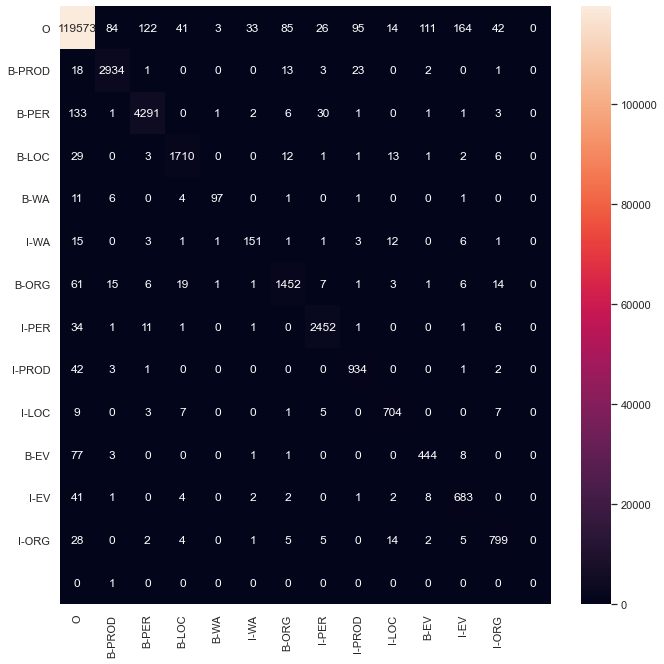

In [24]:
import seaborn as sns
cm=confusion_matrix(final_df.annotator_1, final_df.annotator_2, final_df.annotator_1.unique())
print(cm)
sns.set(rc={'figure.figsize':(11,11)})
sns.heatmap(cm, annot=True, xticklabels=final_df.annotator_1.unique(),yticklabels=final_df.annotator_1.unique(),fmt='g')

In [49]:
coder1_new = []
coder2_new = []
for i in range(len(final_df.annotator_1.values)):
    coder1_new.append([1,i,final_df.annotator_1.values[i]])
    coder2_new.append([2,i,final_df.annotator_2.values[i]])


formatted_codes = coder1_new + coder2_new

# formatted_codes = [ [final_df.annotator_1.values[i],final_df.annotator_2.values[i]] for i in range(len(final_df.annotator_1))]

In [51]:
ratingtask = agreement.AnnotationTask(data=formatted_codes)

print('Cohen\'s Kappa:',ratingtask.kappa())
print('Cohen\'s Weighted Kappa:',ratingtask.weighted_kappa())
print('Fleiss\'s Kappa:',ratingtask.multi_kappa())
print('Krippendorff\'s Kappa:',ratingtask.alpha())


Cohen's Kappa: 0.9435274524902508
Cohen's Weighted Kappa: 0.9435274524902508
Fleiss's Kappa: 0.9435274524902508
Krippendorff's Kappa: 0.9435269575459516


In [59]:
final_df[final_df.annotator_1!=final_df.annotator_2].groupby('tweet_id').count()

,token,index,annotator_1,annotator_2
tweet_id,,,,
1380716397886533633,1,1,1,1
1380729945752674307,1,1,1,1
1380761194525433859,2,2,2,2
1380767147387850758,3,3,3,3
1380772732963487747,1,1,1,1
...,...,...,...,...
1391510684387528707,1,1,1,1
1391511690445950977,3,3,3,3
1391567799068200963,3,3,3,3
